___
<h1> Machine Learning </h1>
<h2> Systems Engineering and Computer Technologies / Engenharia de Sistemas e Tecnologias Informáticas
(LESTI)</h2>
<h3> Instituto Superior de Engenharia / Universidade do Algarve </h3>

[LESTI](https://ise.ualg.pt/curso/1941) / [ISE](https://ise.ualg.pt) / [UAlg](https://www.ualg.pt)

Pedro J. S. Cardoso (pcardoso@ualg.pt)

___

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedShuffleSplit

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

import pandas as pd

# Decision Trees
## Classification

Let us start, again, with the iris dataset. Following the same flow, it is now easy to train a Decision Tree Model

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [2]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    train_size=.75,
                                                    random_state=42)

dtc = DecisionTreeClassifier(
    random_state=42,
).fit(X_train, y_train)

With a perfect score on training

In [3]:
score = dtc.score(X_train, y_train)
score   

1.0

and also in test...!

In [4]:
score = dtc.score(X_test, y_test)
score   

1.0

Ater this, we can plot the tree

[Text(0.3076923076923077, 0.9285714285714286, 'petal length (cm) <= 2.45\ngini = 0.666\nsamples = 112\nvalue = [35, 39, 38]\nclass = versicolor'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = setosa'),
 Text(0.38461538461538464, 0.7857142857142857, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 77\nvalue = [0, 39, 38]\nclass = versicolor'),
 Text(0.15384615384615385, 0.6428571428571429, 'petal width (cm) <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.6153846153846154, 0.6428571428571429, 'petal width (cm) <= 1.75\ngini = 0.21\nsamples = 42\nvalue = [0, 5, 37]\nclass = virginica'),
 Text(0.38461538461538464, 0.5, 'petal length (cm) <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]\nclass = v

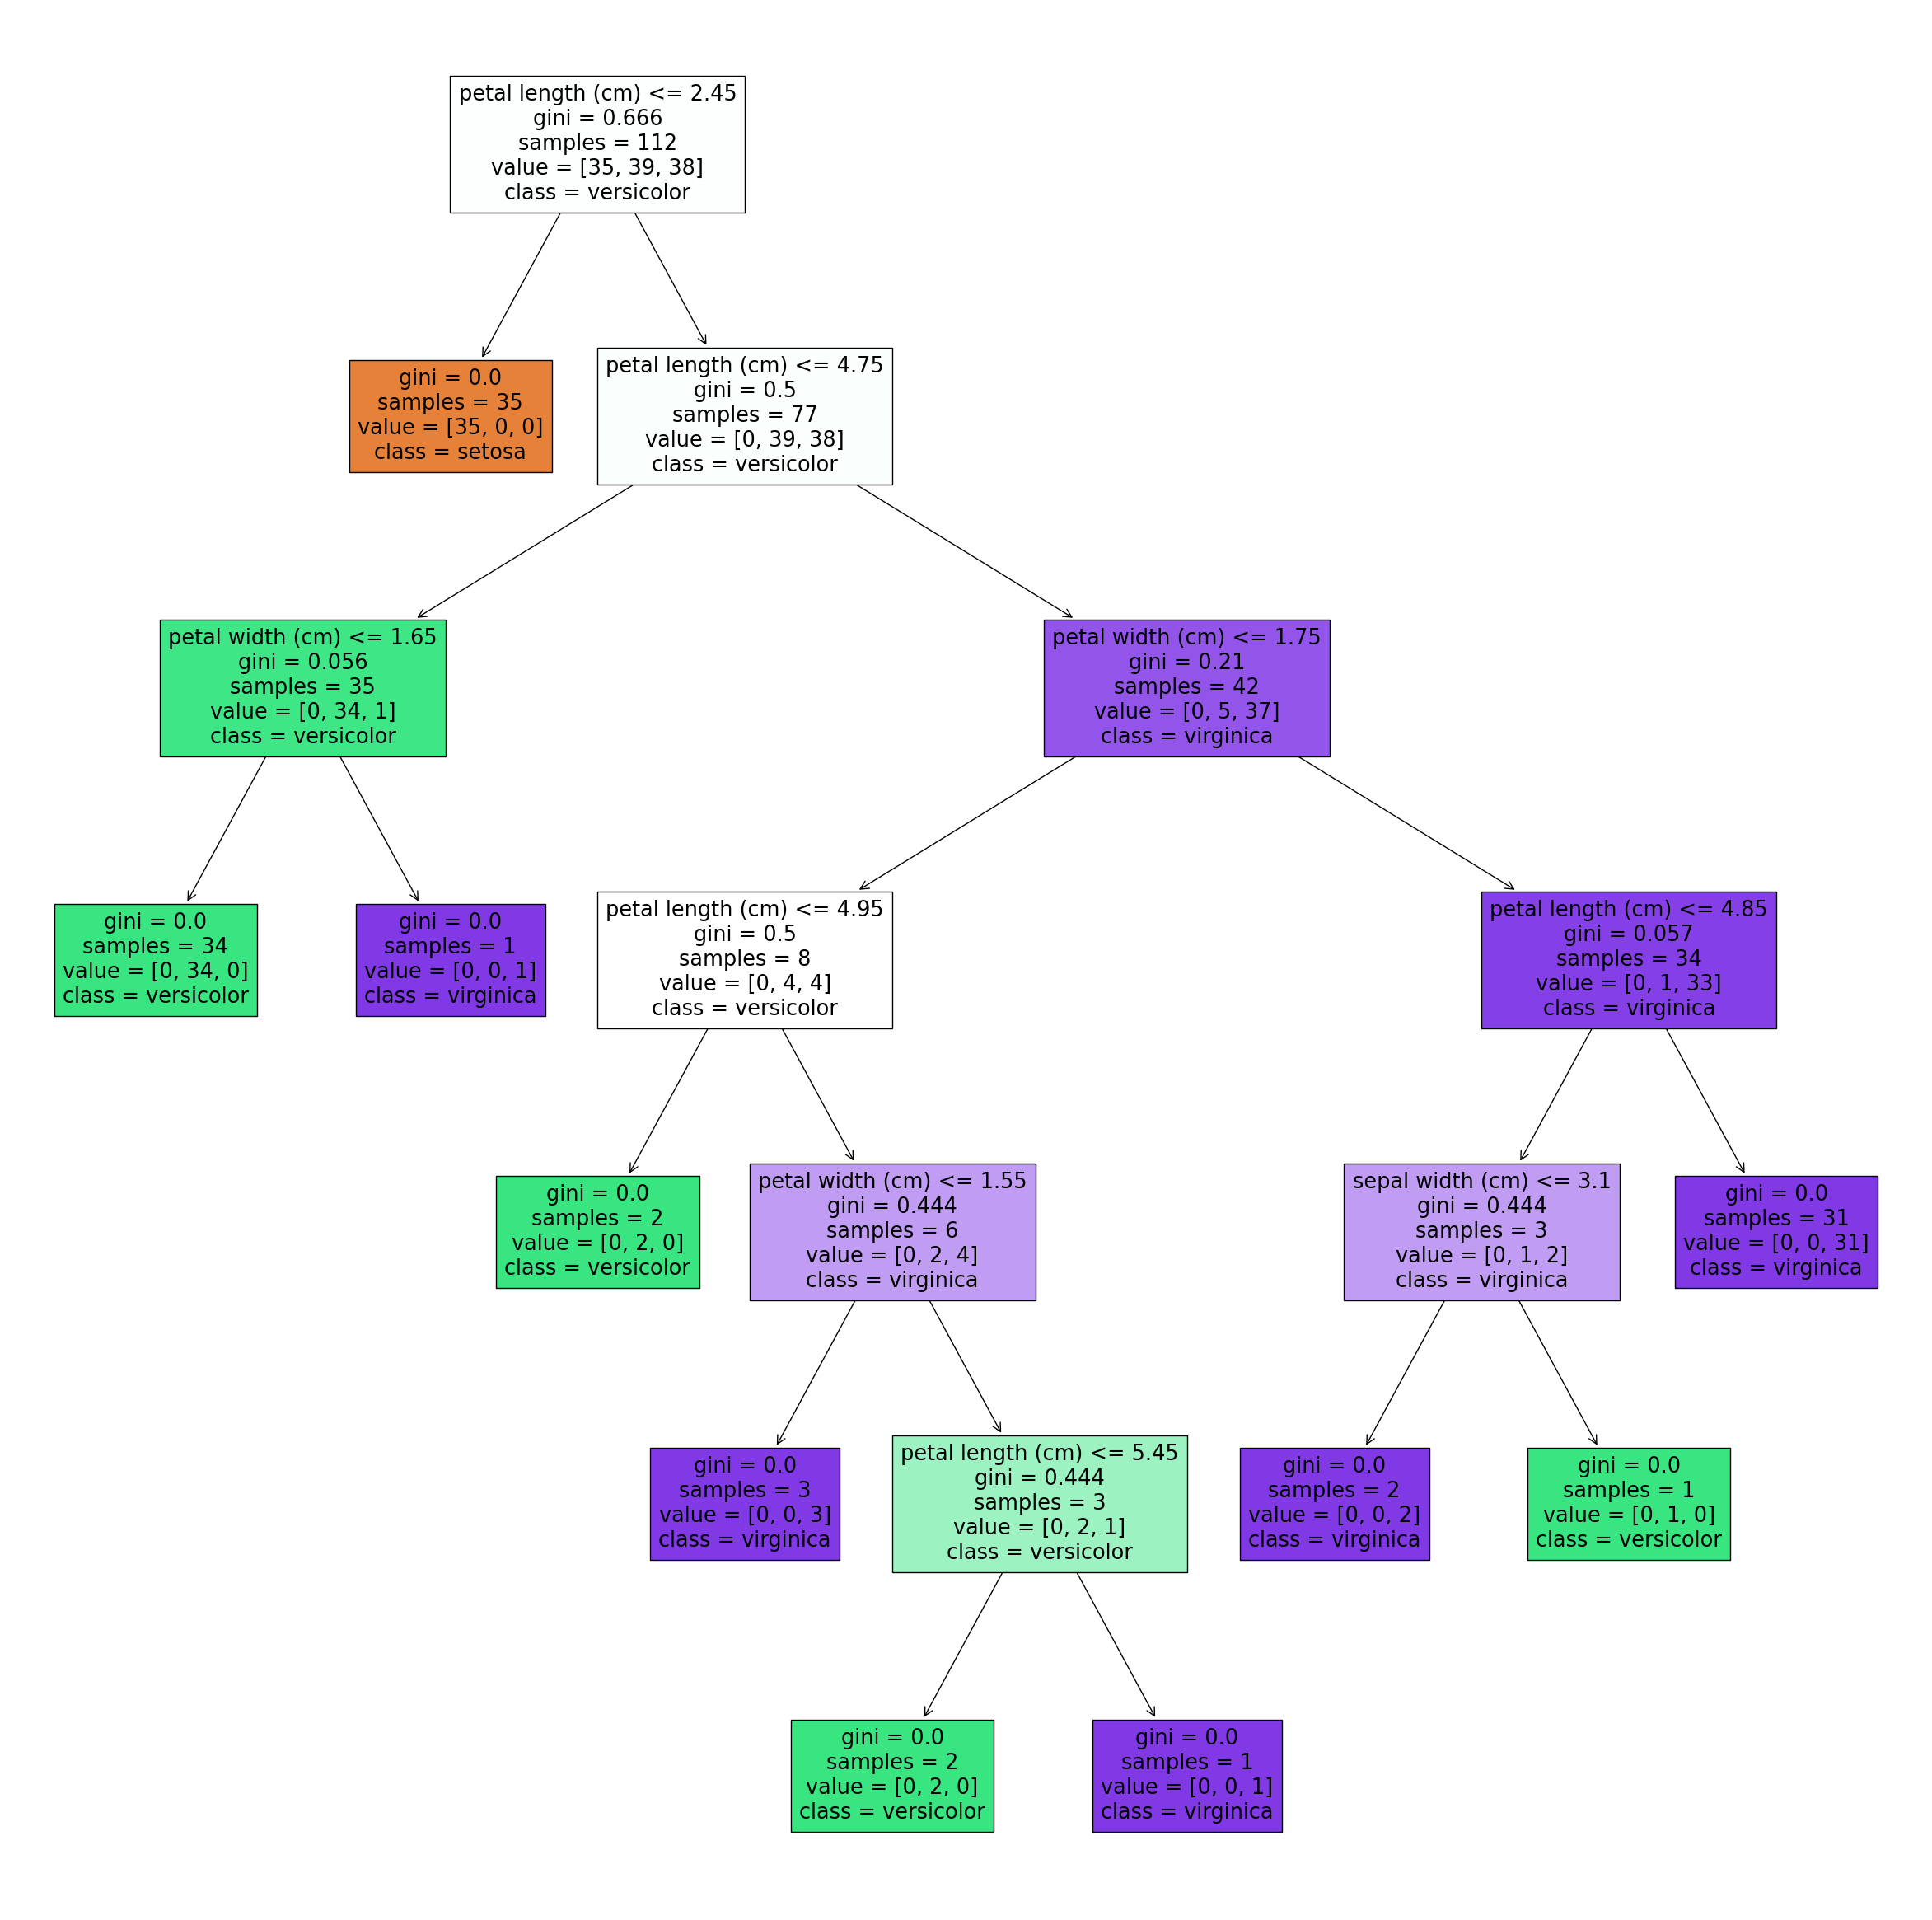

In [5]:
fig, axes = plt.subplots(figsize = (30, 30))

tree.plot_tree(
    dtc,
    feature_names = iris.feature_names,
    class_names=iris.target_names,
    filled = True
)

Use the plotted tree to predict some of the test examples shown below... and check if the prediction is correct.

In [6]:
temp_df = pd.DataFrame(
    iris.data[::35],
    columns=iris.feature_names
)
temp_df["target"] = iris.target_names[iris.target[::35]]
temp_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,5.0,3.2,1.2,0.2,setosa
2,5.9,3.2,4.8,1.8,versicolor
3,7.6,3.0,6.6,2.1,virginica
4,6.7,3.1,5.6,2.4,virginica


If we do some cross validation
(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) using a stratified shuffle split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) that is not so perfect!

In the first example, then minimum number of samples required to be at a leaf node is 1. 

In [7]:
skf = StratifiedShuffleSplit(
    n_splits=10,
    random_state=1
)

clf = DecisionTreeClassifier(
    random_state=1
)

scores = cross_val_score(
    clf,
    iris.data, iris.target, 
    cv=skf
)

print(f'scores:{scores}\nmu:{scores.mean()}')

scores:[0.93333333 0.93333333 0.8        0.93333333 0.93333333 0.86666667
 1.         0.86666667 0.93333333 0.93333333]
mu:0.9133333333333334


In the second example, we increase minimum number of samples required to be at a leaf node to be 3, giving a slight increase in performance

In [8]:
clf = DecisionTreeClassifier(
    random_state=1,
    min_samples_leaf = 3,
)

scores = cross_val_score(
    clf,
    iris.data, iris.target, 
    cv=skf
)

print(f'scores:{scores}\nmu:{scores.mean()}')

scores:[0.93333333 0.93333333 1.         0.93333333 0.93333333 0.93333333
 1.         0.86666667 0.93333333 0.93333333]
mu:0.9400000000000001


## Regression
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

Let us consider the Seoul Bike Sharing Demand dataset. The dataset contains the hourly count of rental bikes between years 2017 and 2018 in Seoul, Korea with the corresponding weather and seasonal information. The dataset can be downloaded from https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand but we have already downloaded it and saved it in the data folder.

Let us start by loading the dataset into a pandas dataframe. 

In [9]:
import pandas as pd
df = pd.read_csv('./../Datasets/SeoulBikeData.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: './../Datasets/SeoulBikeData.csv'

By calling the dataframe's info method, we can see that there are no missing values but there are some categorical columns.

In [ ]:
df.info()

The categorical columns need to be converted into, for example, dummy variables. 

A dummy variable is a numerical variable used in regression analysis to represent subgroups of the sample in your study. In research design, a dummy variable is often used to distinguish different treatment groups. for example the season column has four categories: Spring, Summer, Autumn, and Winter. We can convert this column into four columns, one for each category, and use 0 or 1 to indicate if the sample belongs to that category or not. To achieve this, we can use the pandas get_dummies method.

In [ ]:
df = pd.get_dummies(df, columns=['Seasons', 'Holiday', 'Functioning Day'], drop_first=True)
df

We can split this column into two columns: month and day, and day of week. To achieve this, we can use the pandas to_datetime method as follows:

In [ ]:
# make sure the date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# create new columns for month, day, and day of week
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['day_of_week'] = df['Date'].dt.day_of_week

# drop the original date column
df.drop('Date', axis=1, inplace=True)

Let us now recheck the dataframe's info method.

In [ ]:
df.info()

Since the target variable is the Rented Bike Count, we can split the dataframe into two dataframes: one with the target variable and another with the remaining variables.

In [ ]:
X = df.drop('Rented Bike Count', axis=1)
y = df['Rented Bike Count']

Now, we can split the data into training and test sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    shuffle=True,
    random_state=42,
    test_size=0.1
)

Define the regressor and do the training

In [ ]:
dtr = DecisionTreeRegressor(
    random_state=0
).fit(X_train, y_train)     

Finaly, we score it

In [ ]:
score = dtr.score(X_test, y_test)
score  

In [ ]:
y_pred = dtr.predict(X_test)

plt.figure(figsize=(15,10))

plt.plot(y_test, y_pred, c='b', marker='o', linestyle='')
plt.plot([0,3500], [0, 3500], c='r', linestyle='--')
plt.xlabel('test')
plt.ylabel('pred')

plt.legend(["test", '"perfect regressor"'])

To be more sure, let us do a cross validation experiment

In [ ]:
kfold = KFold(
    n_splits=5, 
    shuffle=True, 
    random_state=1
)

reg = DecisionTreeRegressor(
    random_state=1,
    min_samples_leaf = 3,
)

scores = cross_val_score(
    reg,
    X, y, 
    cv=kfold
)

print(f'scores:{scores}\nmu:{scores.mean()}')

## Slide's example

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt


n = 25
a, b = 0, 10
x = np.linspace(a, b, n)
y = np.sin(x)
plt.plot(x, y, ".")

In [ ]:
model = DecisionTreeRegressor(min_samples_leaf=1).fit(x.reshape(-1, 1), y)

x_hat = np.linspace(a, b, 100).reshape(-1, 1)
y_hat = model.predict(x_hat)
plt.plot(x, y, ".")
plt.plot(x_hat, y_hat)

plt.legend(["data", "approx."])
plt.title("Decision regression tree (min_samples_leaf=1)")
plt.xlabel('data')
plt.ylabel('target')

In [ ]:
model = DecisionTreeRegressor(min_samples_leaf=2).fit(x.reshape(-1, 1), y)

x_hat = np.linspace(a, b, 100).reshape(-1, 1)
y_hat = model.predict(x_hat)
plt.plot(x, y, ".")
plt.plot(x_hat, y_hat)

plt.legend(["data", "approx."])
plt.title("Decision regression tree (min_samples_leaf=2)")
plt.xlabel('data')
plt.ylabel('target')

In [ ]:
fig, axes = plt.subplots(figsize = (30, 10))

tree.plot_tree(
    model,
    feature_names=["x"],
    filled=True,
    fontsize=12
)
plt.show()